In [95]:
# Imports functions into the program
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#These are imported specifically for the use of the histogram.
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib import gridspec
import scipy

#Imported for categorization of the Sources
from scipy import stats
import astropy.stats as ast
from astropy.visualization import hist
import urllib.request
import lmfit

# Import from BB analysis github
import HopFinder
import HOP
import LC
import LC_Set

import glob
import lightgbm as gbm
# from gbm.binning.unbinned import bin_by_time
# from gbm.plot import Lightcurve
# from gbm.data.primitives import EventList, TimeBins
# from gbm.background import BackgroundFitter
# from gbm.background.binned import Polynomial
# from gbm.background import BackgroundRates
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
# from lmfit.models import StepModel, LinearModel

# Data Prep

In [2]:

base = 'shared_plot_arrays/'

# bcu_flares = np.load(base+'bcu_flares.npy')
# bll_flares = np.load(base+'bll_flares.npy')
# fsrq_flares = np.load(base+'fsrq_flares.npy')
# total_flares = np.load(base+'total_flares.npy')

bcu_fluencecount=np.load(base+'bcu_fluencecount.npy')
bll_fluencecount=np.load(base+'bll_fluencecount.npy')
fsrq_fluencecount=np.load(base+'fsrq_fluencecount.npy')[:-1]
#bcu_fluencecount_error=np.sqrt(bcu_fluencecount)
#bll_fluencecount_error=np.sqrt(bll_fluencecount)
#fsrq_fluencecount_error=np.sqrt(fsrq_fluencecount)
bcu_fluencecount_error=np.load(base+'bcu_fluencecount_error.npy')
bll_fluencecount_error=np.load(base+'bll_fluencecount_error.npy')
fsrq_fluencecount_error=np.load(base+'fsrq_fluencecount_error.npy')[:-1]
bll_fluencethresholds=np.load(base+'bll_fluencethresholds.npy')
bcu_fluencethresholds=np.load(base+'bcu_fluencethresholds.npy')
fsrq_fluencethresholds=np.load(base+'fsrq_fluencethresholds.npy')[:-1]

simulated_bcu_fluencecount=np.load(base+'simulated_bcu_fluencecount.npy')
simulated_bll_fluencecount=np.load(base+'simulated_bll_fluencecount.npy')
simulated_fsrq_fluencecount=np.load(base+'simulated_fsrq_fluencecount.npy')
simulated_bcu_fluencethresholds=np.load(base+'simulated_bcu_fluencethresholds.npy')
simulated_bll_fluencethresholds=np.load(base+'simulated_bll_fluencethresholds.npy')
simulated_fsrq_fluencethresholds=np.load(base+'simulated_fsrq_fluencethresholds.npy')
simulated_total_fluencecount=np.load(base+'simulated_total_fluencecount.npy')
simulated_total_fluencethresholds=np.load(base+'simulated_total_fluencethresholds.npy')

red_noise_simulated_bcu_fluencecount=np.load(base+'red_noise_simulated_bcu_fluencecount.npy')
red_noise_simulated_bll_fluencecount=np.load(base+'red_noise_simulated_bll_fluencecount.npy')
red_noise_simulated_fsrq_fluencecount=np.load(base+'red_noise_simulated_fsrq_fluencecount.npy')
red_noise_simulated_bcu_fluencethresholds=np.load(base+'red_noise_simulated_bcu_fluencethresholds.npy')
red_noise_simulated_bll_fluencethresholds=np.load(base+'red_noise_simulated_bll_fluencethresholds.npy')
red_noise_simulated_fsrq_fluencethresholds=np.load(base+'red_noise_simulated_fsrq_fluencethresholds.npy')
red_noise_simulated_total_fluencecount=np.load(base+'red_noise_simulated_total_fluencecount.npy')
red_noise_simulated_total_fluencethresholds=np.load(base+'red_noise_simulated_total_fluencethresholds.npy')

white_noise_simulated_bcu_fluencecount=np.load(base+'white_noise_simulated_bcu_fluencecount.npy')
white_noise_simulated_bll_fluencecount=np.load(base+'white_noise_simulated_bll_fluencecount.npy')
white_noise_simulated_fsrq_fluencecount=np.load(base+'white_noise_simulated_fsrq_fluencecount.npy')
white_noise_simulated_bcu_fluencethresholds=np.load(base+'white_noise_simulated_bcu_fluencethresholds.npy')
white_noise_simulated_bll_fluencethresholds=np.load(base+'white_noise_simulated_bll_fluencethresholds.npy')
white_noise_simulated_fsrq_fluencethresholds=np.load(base+'white_noise_simulated_fsrq_fluencethresholds.npy')
white_noise_simulated_bcu_fluencethresholds=np.load(base+'white_noise_simulated_bcu_fluencethresholds.npy')
white_noise_simulated_total_fluencecount=np.load(base+'white_noise_simulated_total_fluencecount.npy')
white_noise_simulated_total_fluencethresholds=np.load(base+'white_noise_simulated_total_fluencethresholds.npy')

#getting rid of the last value of each array. The last value in fluence count is a 0, so we don't need it.
# It also messes up the math later on.
# fsrq_fluencecount[-1]=0.1
# fsrq_fluencethresholds[-1]=120
# fsrq_fluencecount_error[-1]=0.1

In [ ]:
cl = ['#FF005D','#1E88E5','#FFC107','000000'] # List of colours for categories

plt.plot(white_noise_simulated_bcu_fluencethresholds,white_noise_simulated_bcu_fluencecount, label='bcu')
plt.plot(white_noise_simulated_bll_fluencethresholds,white_noise_simulated_bll_fluencecount,label='bll')
plt.plot(white_noise_simulated_fsrq_fluencethresholds,white_noise_simulated_fsrq_fluencecount,label='fsrq')
plt.plot(white_noise_simulated_total_fluencethresholds,white_noise_simulated_total_fluencecount, label='total')
plt.legend()
plt.title('White Noise')
plt.xlabel('Fluence Threshold 0.1-100 GeV')
plt.ylabel('Number of Flares')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.plot(red_noise_simulated_bcu_fluencethresholds,red_noise_simulated_bcu_fluencecount,label='bcu')
plt.plot(red_noise_simulated_bll_fluencethresholds,red_noise_simulated_bll_fluencecount,label='bll')
plt.plot(red_noise_simulated_fsrq_fluencethresholds,red_noise_simulated_fsrq_fluencecount,label='fsrq')
plt.plot(red_noise_simulated_total_fluencethresholds,red_noise_simulated_total_fluencecount,label='total')
plt.legend()
plt.title('Red Noise')
plt.xlabel('Fluence Threshold 0.1-100 GeV')
plt.ylabel('Number of Flares')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.plot(simulated_bcu_fluencethresholds,simulated_bcu_fluencecount,label='bcu')
plt.plot(simulated_bll_fluencethresholds,simulated_bll_fluencecount,    label='bll')
plt.plot(simulated_fsrq_fluencethresholds,simulated_fsrq_fluencecount,label='fsrq')
plt.plot(simulated_total_fluencethresholds,simulated_total_fluencecount,label='total')
plt.legend()
plt.title('Simulated')
plt.xlabel('Fluence Threshold 0.1-100 GeV')
plt.ylabel('Number of Flares')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.figure()
plt.plot(bcu_fluencethresholds,bcu_fluencecount)
plt.errorbar(bcu_fluencethresholds,bcu_fluencecount,yerr=bcu_fluencecount_error,label='bcu')
plt.yscale('log')
plt.xscale('log')
plt.plot(bll_fluencethresholds,bll_fluencecount)
plt.errorbar(bll_fluencethresholds,bll_fluencecount,yerr=bll_fluencecount_error,label='bll')
plt.yscale('log')
plt.xscale('log')
plt.plot(fsrq_fluencethresholds,fsrq_fluencecount)
plt.errorbar(fsrq_fluencethresholds,fsrq_fluencecount,yerr=fsrq_fluencecount_error,label='fsrq')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Fluence Threshold 0.1-100 GeV')
plt.ylabel('Number of Flares')
plt.legend()

plt.figure()
plt.plot(fsrq_fluencethresholds,fsrq_fluencecount,color="tab:red",label='fsrq')
#plt.plot(simulated_fsrq_fluencethresholds,simulated_fsrq_fluencecount,label='fsrqsim')
plt.plot(red_noise_simulated_fsrq_fluencethresholds,red_noise_simulated_fsrq_fluencecount,label='red',color="red")
plt.plot(white_noise_simulated_fsrq_fluencethresholds,white_noise_simulated_fsrq_fluencecount,label='white',color="silver")
plt.legend()
plt.xlabel('Fluence Threshold 0.1-100 GeV')
plt.ylabel('Number of Flares')
plt.yscale('log')
plt.xscale('log')

## Interpolation Test

In [ ]:
newx=np.logspace(np.log10(0.028),np.log10(60),1000)
whitesimfsrqspline = interp1d(white_noise_simulated_fsrq_fluencethresholds, white_noise_simulated_fsrq_fluencecount,fill_value='extrapolate')
redsimfsrqspline = interp1d(red_noise_simulated_fsrq_fluencethresholds, red_noise_simulated_fsrq_fluencecount,fill_value='extrapolate')
plt.figure(figsize=(15,7))
plt.errorbar(fsrq_fluencethresholds, fsrq_fluencecount/np.max(fsrq_fluencecount), yerr=fsrq_fluencecount_error/np.max(fsrq_fluencecount), label='FSRQ Data', marker='.')
plt.plot(newx, redsimfsrqspline(newx)/np.max(redsimfsrqspline(newx)), label='Red Simulated FSRQ', marker='.', color='red')
plt.plot(newx, whitesimfsrqspline(newx)/np.max(whitesimfsrqspline(newx)), label='White Simulated FSRQ', marker='.', color='silver')
plt.plot(newx, redsimfsrqspline(newx)/np.max(redsimfsrqspline(newx))+ whitesimfsrqspline(newx)/np.max(whitesimfsrqspline(newx)), label='Red + White Simulated FSRQ', marker='.', color='black')
plt.legend()
plt.yscale('log')
plt.xscale('log')

## Try to fit a smoothly broken powelaw

$$
f(E) = N \left(\frac{E}{E_0}\right)^{-\Gamma_1} 
\left[ 1 + \left( \frac{E}{E_b} \right)^{\Delta} \right]^{\frac{\Gamma_1 - \Gamma_2}{\Delta}}
$$

Where:

- \( E \) : Energy (independent variable)
- \( N \) : Normalization at \( E_0 \)
- \( E_0 \) : Pivot energy (reference energy)
- \( E_b \) : Break energy
- \( \Gamma_1 \) : Spectral index before the break
- \( \Gamma_2 \) : Spectral index after the break
- \( \Delta \) : Smoothness parameter of the break

In [ ]:
def smoothly_broken_power_law(x, N, x0, xb, Gamma1, Gamma2, Delta):

    # Convert inputs to arrays if possible for vectorized operations
    x = np.array(x, ndmin=1)  # Ensures E is at least 1D

    # Compute the SBPL
    term = (1.0 + (x / xb)**Delta) ** ((Gamma1 - Gamma2) / Delta)
    f = N * (x / x0)**(-Gamma1) * term

    # Return as array or scalar based on input
    return f if x.size > 1 else f[0]

# Example parameters
N = 1.0      # Normalization at E0
E0 = 1.0     # Pivot energy (e.g. 1 keV)
Eb = 10.0    # Break energy (e.g. 10 keV)
Gamma1 = 1.0 # Slope before break
Gamma2 = 2.5 # Slope after break
Delta = 1.0  # Smoothness parameter

E_values = np.logspace(0, 2, 200) # Energies from 1 to 100 (if E0=1)
f_values = smoothly_broken_power_law(E_values, N, E0, Eb, Gamma1, Gamma2, Delta)

plt.loglog(E_values, f_values, label='Smoothly Broken PLW')
plt.axvline(Eb, color='r', linestyle='--', label='Break')
plt.xlabel('Energy')
plt.ylabel('Flux')
plt.title('Smoothly Broken Power Law')
plt.legend()
plt.show()



In [ ]:
fsrq_sel = np.where((fsrq_fluencecount>10)&(fsrq_fluencethresholds>0.02))
bll_sel = np.where((bll_fluencecount>10)&(bll_fluencethresholds>0.02))

plt.figure(figsize=(15,7))
plt.errorbar(fsrq_fluencethresholds, fsrq_fluencecount, yerr=fsrq_fluencecount_error, marker='', alpha=0.1, color='tab:red')
plt.errorbar(fsrq_fluencethresholds[fsrq_sel], fsrq_fluencecount[fsrq_sel], yerr=fsrq_fluencecount_error[fsrq_sel], label='FSRQ Data', marker='.', color='tab:red')
plt.errorbar(bll_fluencethresholds, bll_fluencecount, yerr=bll_fluencecount_error, marker='', alpha=0.1)
plt.errorbar(bll_fluencethresholds[bll_sel], bll_fluencecount[bll_sel], yerr=bll_fluencecount_error[bll_sel], label='BLL Data', marker='.', color='tab:blue')
plt.legend(fontsize=15)
plt.xlabel('Fluence Threshold 0.1-100 GeV', size=18)
plt.ylabel('Number of Flares', size=18)
plt.yscale('log')
plt.xscale('log')

In [ ]:
fsrq_data_tofit = fsrq_fluencecount[fsrq_sel]
fsrq_data_tofit_error = np.sqrt(fsrq_fluencecount[fsrq_sel])
bll_data_tofit = bll_fluencecount[bll_sel]
bll_data_tofit_error = np.sqrt(bll_fluencecount[bll_sel])

fsrq_sbpl_ptot, fsrq_sbpl_cov = curve_fit(smoothly_broken_power_law, fsrq_fluencethresholds[fsrq_sel], fsrq_data_tofit, sigma=fsrq_data_tofit_error, p0=[1, 1, 1, 1, 1, 1])
fsrq_sbpl_err = np.sqrt(np.diag(fsrq_sbpl_cov))

bll_sbpl_ptot, bll_sbpl_cov = curve_fit(smoothly_broken_power_law, bll_fluencethresholds[bll_sel], bll_data_tofit, sigma=bll_data_tofit_error, p0=[1, 1, 1, 1, 1, 1])
bll_sbpl_err = np.sqrt(np.diag(bll_sbpl_cov))

plt.figure(figsize=(9,7))
plt.errorbar(fsrq_fluencethresholds[::10], fsrq_fluencecount[::10], yerr=np.sqrt(fsrq_fluencecount[::10]),  marker='', alpha=0.1, color='tab:red', zorder=0)
plt.errorbar(fsrq_fluencethresholds[fsrq_sel][::10], fsrq_fluencecount[fsrq_sel][::10], yerr=np.sqrt(fsrq_fluencecount[fsrq_sel][::10]), label='FSRQ Data', marker='.', color='tab:red', zorder=0, alpha=0.3)
plt.plot(fsrq_fluencethresholds[fsrq_sel][::10], smoothly_broken_power_law(fsrq_fluencethresholds[fsrq_sel][::10], *fsrq_sbpl_ptot), 
         label='FSRQ Fit (F$_{break}$=%i$\pm$%i MeV/cm$^2$)'%(fsrq_sbpl_ptot[2]*1000, fsrq_sbpl_err[2]*1000), color='black', linestyle='--', zorder=2, linewidth=3)

plt.errorbar(bll_fluencethresholds[::10], bll_fluencecount[::10], yerr=np.sqrt(bll_fluencecount[::10]), marker='', color='tab:blue', alpha=0.1, zorder=0)
plt.errorbar(bll_fluencethresholds[bll_sel][::10], bll_fluencecount[bll_sel][::10], yerr=np.sqrt(bll_fluencecount[bll_sel][::10]), label='BLL Data', marker='.', color='tab:blue', zorder=0, alpha=0.3)
plt.plot(bll_fluencethresholds[bll_sel][::10], smoothly_broken_power_law(bll_fluencethresholds[bll_sel][::10], *bll_sbpl_ptot), 
         label='BLL Fit (F$_{break}$=%i$\pm$%i MeV/cm$^2$)'%(bll_sbpl_ptot[2]*1000, bll_sbpl_err[2]*1000), color='black', linestyle='-.', zorder=2, linewidth=3)

plt.vlines(fsrq_sbpl_ptot[2], 1, 1000, color='red', linestyle='-', label='FSRQ Break Energy', zorder=1)
plt.vlines(bll_sbpl_ptot[2], 1, 1000, color='blue', linestyle='-', label='BLL Break Energy', zorder=1)

plt.legend(fontsize=12)
plt.xlabel('Fluence Threshold 0.1-100 GeV', size=18)
plt.ylabel('Number of Flares', size=18)
plt.xlim(0.05, 15)
plt.ylim(3,1000)
plt.yscale('log')
plt.xscale('log')


# Tony's tests

In [8]:
def white_noise(x,a,b):
    return a * whitesimfsrqspline(x+b)

def red_noise(x,c,d):
    return c * redsimfsrqspline(x+d)

def white_and_red_noise(x,a,b,c,d):
    #return white_noise(x,a,b) + red_noise(x,c,d)
    return a * whitesimfsrqspline(x+b) + c * redsimfsrqspline(x+d)

def white_and_red_noise_with_offset(x,a,c,e):
    return a * whitesimfsrqspline(x) + c * redsimfsrqspline(x) + e


In [ ]:
#np.seterr(all='ignore')
#gfit = curve_fit(gwhite_and_red_noise,fsrq_fluencethresholds,1/fsrq_fluencecount,sigma=1/fsrq_fluencecount_error/15,absolute_sigma=False)
popt,pcov = curve_fit(white_and_red_noise,fsrq_fluencethresholds[fsrq_sel], fsrq_fluencecount[fsrq_sel], sigma=fsrq_fluencecount_error[fsrq_sel],
                      absolute_sigma=True,
                      p0=[0.05110262,0.00712008,0.04264287,0.06583839])
                      
print(popt)
print(np.sqrt(pcov))
#[0.05110262,0.00712008,0.04264287,0.06583839]

In [ ]:
# Scalar for white noise
a = popt[0]
# Vertical shift for white noise
b = popt[1]
# Scalar for red noise
c = popt[2]
# Vertical shift for red noise
d = popt[3]



plt.plot(newx-0.8*newx, white_and_red_noise(newx,0.2,b,c,d)*1.8,color='black',label = 'whiteandrednoisefit')
plt.plot(newx-0.8*newx, white_noise(newx,0.2,b)*1.8,color='silver',label='white')
plt.plot(newx-0.8*newx, red_noise(newx,c,d)*1.8,color='red',label = 'red')
plt.title('Fitting Red and White Simulations to Total Simulation')
# plt.plot(fsrq_fluencethresholds,fsrq_fluencecount,label='fsrq')
plt.errorbar(fsrq_fluencethresholds[fsrq_sel],fsrq_fluencecount[fsrq_sel],yerr=fsrq_fluencecount_error[fsrq_sel],label='fsrq')
plt.ylabel('fluencecounts')
plt.xlabel('fluence thresholds')
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [ ]:
#np.seterr(all='ignore')
#gfit = curve_fit(gwhite_and_red_noise,fsrq_fluencethresholds,1/fsrq_fluencecount,sigma=1/fsrq_fluencecount_error/15,absolute_sigma=False)
popt,pcov = curve_fit(white_and_red_noise_with_offset,fsrq_fluencethresholds[0:200],fsrq_fluencecount[0:200],sigma=fsrq_fluencecount_error[0:200]/15,absolute_sigma=False,p0=[1,1,0])
print(popt)
print(pcov)

In [ ]:
def shifttest(x):
    return np.log10(x)
shifttestthresholds=np.logspace(0,2,1000)
shifttestcounts=np.logspace(2,0,1000)
shifttestcounts[500],shifttestcounts[999],shifttestcounts[0]=0,0,0
plt.plot(shifttestthresholds,shifttestcounts, label = 'default shift')
plt.plot(shifttestthresholds-np.log10(10),shifttestcounts, label = 'log(10) shift')
plt.plot(shifttestthresholds-10,shifttestcounts, label = '10 shift')
plt.plot(shifttestthresholds-np.log10(100),shifttestcounts, label = 'log100 shift')
plt.plot(shifttestthresholds-100,shifttestcounts, label = '100 shift')


plt.ylabel('shift test counts')
plt.xlabel('shift test threshold')
#print(fsrq_fluencethresholds)
plt.yscale('log')
plt.xscale('log')
plt.title('test for shifting of logarithmically scaled plots')
plt.legend()

## Testing for Convolution

In [ ]:
def conv_white_then_red(x,a,b,c,d,):
    return c*redsimfsrqspline(a*whitesimfsrqspline(x)+b)+d

def conv_red_then_white(x,a,b,c,d):
    return a*whitesimfsrqspline(c*redsimfsrqspline(x)+d)+b

# Scalar for white noise
a = popt[0]
# Vertical shift for white noise
b = popt[1]
# Scalar for red noise
c = popt[2]
# Vertical shift for red noise
d = popt[3]


plt.plot(newx, conv_red_then_white(newx,a,b,c,d),color='green',label = 'red_then_white')
plt.plot(newx, conv_white_then_red(newx,a,b,c,d),color='black',label = 'white_then_red')
plt.plot(newx, white_noise(newx,a,b),color='silver',label='white')
plt.plot(newx, red_noise(newx,c,d),color='red',label = 'red')
plt.plot(simulated_fsrq_fluencethresholds,simulated_fsrq_fluencecount,label='simulated total')
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [ ]:
print(fsrq_fluencecount[-1])
print((fsrq_fluencecount_error[-1])/15)
print(fsrq_fluencethresholds[-1])

In [ ]:
# Keep messing with fit of graph to get curvefit to line up with white_and_red_noise data
# Determine a,b,c,d.
# Keep fiddling with bayesian blocks
# Begin looking into the different types of noise (red,white,pink,blue, etc) and start prepping a presentation
# Keep taking notes on what you test and what you find, so that you can show everything you did and what you found

In [ ]:
# model data as Step + Line
step_mod = StepModel(form='linear', prefix='step_')
line_mod = LinearModel(prefix='line_')

model = step_mod + line_mod

# make named parameters, giving initial values:
pars = model.make_params(line_intercept=fsrq_fluencecount.min(),
                         line_slope=0,
                         step_center=fsrq_fluencethresholds.mean(),
                         step_amplitude=fsrq_fluencecount.std(),
                         step_sigma=2.0)

# fit data to this model with these parameters
out = model.fit(fsrq_fluencecount, pars, x=fsrq_fluencethresholds)

# print results
print(out.fit_report())

# plot data and best-fit
plt.plot(fsrq_fluencethresholds, fsrq_fluencecount, 'b',label='data')
plt.plot(fsrq_fluencethresholds, out.best_fit, 'r-',label='best fit')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

## Testing White Noise and Red Noise Examples

In [14]:
# Here I'm generating a random white noise array, and then generating a random red noise array from this.
mean=0
std=1
N=1000
w=np.random.normal(mean,std,size=N)
correlcoeff=0.583838383438
r=np.zeros(N)
r[0]=w[0]
for i in range(1,len(w)-1):
    r[i]=correlcoeff*r[i-1]+((1-r[i]**2)**0.5)*w[i]

In [ ]:
plt.plot(w, linewidth=0.5,label='White Noise')
plt.plot(r, linewidth=0.5,label='Red Noise')
plt.legend()
plt.title('Raw Noises')

In [16]:
signal_input=np.linspace(0,10,1000)
signal_output=np.sin(signal_input)

In [17]:
white_noisy_signal= signal_output + 0.2 * w
red_noisy_signal= signal_output + 0.2 * r

In [ ]:
plt.plot(signal_input,white_noisy_signal,label='white noise')
plt.plot(signal_input,red_noisy_signal,label='red noise')

In [ ]:
white_f,white_psd = scipy.signal.welch(white_noisy_signal)
red_f, red_psd = scipy.signal.welch(red_noisy_signal)

plt.plot(white_f, white_psd, label='White Noise')
plt.plot(red_f, red_psd, label='Red Noise')
#plt.xscale('log')
plt.yscale('log')

In [ ]:
af2,af1 = scipy.signal.butter(3,0.1)
filtered_white_signal = scipy.signal.filtfilt(af2,af1,white_noisy_signal)
filtered_red_signal = scipy.signal.filtfilt(af2,af1,red_noisy_signal)

plt.plot(white_noisy_signal,label='White Noise')
plt.plot(filtered_white_signal, label = 'Filtered')
plt.title('White')
plt.show()

plt.plot(red_noisy_signal,label='Red Noise')
plt.plot(filtered_red_signal, label = 'Filtered')
plt.title('Red')
plt.show()

In [ ]:
samplelog = np.linspace(0.1,500,1000)
plt.plot(samplelog+w,)
plt.yscale('log')
plt.xscale('log')
plt.title('effets of noise on log plot')

# Bayesian Block

In [73]:
table = "new_db_Feb2023.csv"
opened = open(table,"r")
readed = pd.read_csv(table, sep=",", na_filter=True)
readed = readed.fillna(-3333)

cadence = 'daily'
cadence_df = readed.loc[(readed['cadence'] == cadence) #& \
                        # (readed['ts2'] <= 4.) & \
                        # (readed['photon_flux_error2'] <  readed['photon_flux2'])
                        ]
#cadence_df.loc[cadence_df['ts2'] <= 9., 'photon_flux2'] = -3333
cadence_df.loc[cadence_df['ts2'] <= 4., ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set as -3333 all points with an error larger than the flux
cadence_df.loc[cadence_df['photon_flux_error2'] > cadence_df['photon_flux2'], ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set cuts to remove possible outliers due to bad convergence of a bin
cadence_df.loc[cadence_df['photon_flux2'] > 1e-4, ['photon_flux2', 'photon_flux_error2']] = -3333
cadence_df.loc[cadence_df['photon_flux2'] < 1e-10, ['photon_flux2', 'photon_flux_error2']] = -3333
#print(cadence_df)
cadence_df = cadence_df.reset_index(drop=True)
TSTART = np.amin(cadence_df['tmin'])
TSTOP = np.amax(cadence_df['tmax'])

names = np.unique(readed['source_name']) #.drop_duplicates(subset=['source_name'], inplace=False)#[1]

df_4lacdr3 = pd.read_csv('4lac_redshifts.csv', delimiter='\t', comment='#')

## Failed BB Analysis

In [ ]:
# This block is just prepping an array for graphing its lightcurve.

# This value indicates which number source we are using. 0 is the first source in the list.
sourcenum = 0 

# This line filters the LCR array down to the chosen source
bayesianblockexamplearray=cadence_df[cadence_df['source_name']==cadence_df['source_name'][sourcenum]] 
print('current array is using source:',cadence_df['source_name'][sourcenum]) # Double checking that the lightcurve array is correct

#Filtering out any 'bad' values for photon flux, and reordering the indices for easier use.
bayesianblockexamplearray = bayesianblockexamplearray[bayesianblockexamplearray['photon_flux2']!=-3333].reset_index(drop=True)
bayesianblockexamplearray['tmin']=bayesianblockexamplearray['tmin']#/(60*60*24*3)
#bayesianblockexamplearray['photon_flux2'] = bayesianblockexamplearray['photon_flux2']/np.mean(bayesianblockexamplearray['photon_flux2'])


# Plotting the light curve in photon flux vs mission elapsed time.
#fig = plt.figure(figsize=(16,6))

plt.plot(bayesianblockexamplearray['tmin'],bayesianblockexamplearray['photon_flux2'])
plt.ylabel('Photon Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('time (s)')
plt.title(cadence_df['source_name'][sourcenum])
plt.figure()
hist(bayesianblockexamplearray['tmin'], bins=200, histtype='stepfilled',alpha=0.3,color='red', density=True, label='standard histogram')

#fig.add_subplot(122)

# Using Astro.py's bayesian block function.
#edges = ast.bayesian_blocks()
#hist(bayesianblockexamplearray['tmin'],bins='blocks',histtype='step',density=True)

In [ ]:
# draw a set of variables
np.random.seed(0)

# truncate values to a reasonable range
t = bayesianblockexamplearray['tmin']

#------------------------------------------------------------
# First figure: show normal histogram binning
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

ax1 = fig.add_subplot(121)
ax1.hist(t, bins=15, histtype='stepfilled', alpha=0.2, density=True)
ax1.set_xlabel('t')
ax1.set_ylabel('P(t)')

ax2 = fig.add_subplot(122)
ax2.hist(t, bins=200, histtype='stepfilled', alpha=0.2, density=True)
ax2.set_xlabel('t')
ax2.set_ylabel('P(t)')

#------------------------------------------------------------
# Second & Third figure: Knuth bins & Bayesian Blocks
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

for bins, title, subplot in zip(['knuth', 'blocks'],
                                ["Knuth's rule", 'Bayesian blocks'],
                                [121, 122]):
    ax = fig.add_subplot(subplot)

    # plot a standard histogram in the background, with alpha transparency
    hist(t, bins=200, histtype='stepfilled',
         alpha=0.2, density=True, label='standard histogram')

    # plot an adaptive-width histogram on top
    hist(t, bins=bins, ax=ax, color='black',
         histtype='step', density=True, label=title)

    ax.legend(prop=dict(size=12))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Photon Flux (Photons/$cm^2\u22c5s^{-1}$)')

plt.show()

In [ ]:
# This value indicates which number source we are using. 0 is the first source in the list.
sourcenum = 0 

# This line filters the LCR array down to the chosen source
bayesianblockexamplearray=cadence_df[cadence_df['source_name']==cadence_df['source_name'][sourcenum]] 
print('current array is using source:',cadence_df['source_name'][sourcenum]) # Double checking that the lightcurve array is correct

#Filtering out any 'bad' values for photon flux, and reordering the indices for easier use.
bayesianblockexamplearray = bayesianblockexamplearray[bayesianblockexamplearray['photon_flux2']!=-3333].reset_index(drop=True)
bayesianblockexamplearray = bayesianblockexamplearray[bayesianblockexamplearray['photon_flux_error2']!=-3333].reset_index(drop=True)
bayesianblockexamplearray['tmin']=bayesianblockexamplearray['tmin']



# assigning variables and weighting data
time = bayesianblockexamplearray['tmin']
photon_flux = bayesianblockexamplearray['photon_flux2']
errors = bayesianblockexamplearray['photon_flux_error2']
weights = photon_flux / np.sum(photon_flux)
scaling_factor = 1e7
weighted_data = np.repeat(time, (weights * scaling_factor).astype(int))
print(len(weighted_data))


fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(122)
#ax.hist(bayesianblockexamplearray['tmin'], bins=200, histtype='stepfilled', alpha=0.2, density=True)
# plot a standard histogram in the background, with alpha transparency
hist(weighted_data, bins=len(time), histtype='stepfilled',alpha=0.3,color='red', density=True, label='standard histogram')
# plot an adaptive-width histogram on top
hist(weighted_data, bins='blocks', ax=ax, color='black',histtype='step', density=True, label='Bayesian Blocks')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Photon Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.title(cadence_df['source_name'][sourcenum])

In [ ]:
# This value indicates which number source we are using. 0 is the first source in the list.
sourcenum = 0 

# This line filters the LCR array down to the chosen source
bayesianblockexamplearray=cadence_df[cadence_df['source_name']==cadence_df['source_name'][sourcenum]] 
print('current array is using source:',cadence_df['source_name'][sourcenum]) # Double checking that the lightcurve array is correct

#Filtering out any 'bad' values for photon flux, and reordering the indices for easier use.
bayesianblockexamplearray = bayesianblockexamplearray[bayesianblockexamplearray['photon_flux2']!=-3333].reset_index(drop=True)
bayesianblockexamplearray['tmin']=bayesianblockexamplearray['tmin']

#Eample time and photon flux data
time = bayesianblockexamplearray['tmin']  # Time bins
photon_flux = bayesianblockexamplearray['photon_flux2']  # Photon flux values
weights = photon_flux / np.sum(photon_flux)  # Normalize weights if needed

# Create a weighted dataset
#weighted_data = np.repeat(time, weights.astype(int))  # Integer weights
# Alternatively, for non-integer weights:
scaling_factor = 1e6  # Scale weights to integers
weighted_data = np.repeat(time, (weights * scaling_factor).astype(int))

# Plot the histogram
plt.plot(time,photon_flux)
plt.title(cadence_df['source_name'][sourcenum])
plt.ylabel('Photon Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.xlabel('Time (s)')
plt.ylim(bottom=0)
plt.figure()
plt.hist(weighted_data, bins=len(time), histtype='step', color='orange', linewidth=2, density=True)
plt.xlabel("Time")
plt.ylabel("Weighted Photon Flux")
plt.title("Manually Weighted Histogram")
plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(122)
#ax.hist(bayesianblockexamplearray['tmin'], bins=200, histtype='stepfilled', alpha=0.2, density=True)
# plot a standard histogram in the background, with alpha transparency
hist(bayesianblockexamplearray['tmin'], bins=len(bayesianblockexamplearray['tmin']), histtype='stepfilled',alpha=0.3,color='red', density=True, label='standard histogram')
# plot an adaptive-width histogram on top
hist(bayesianblockexamplearray['tmin'], bins='blocks', ax=ax, color='black',histtype='step', density=True, label='Bayesian Blocks')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Photon Flux (Photons/$cm^2\u22c5s^{-1}$)')
plt.title(cadence_df['source_name'][sourcenum])

In [ ]:
edges=ast.bayesian_blocks(time,photon_flux,fitness='measures')
plt.hist(photon_flux,edges)

In [ ]:
# This value indicates which number source we are using. 0 is the first source in the list.
sourcenum = 6 

# This line filters the LCR array down to the chosen source
bayesianblockexamplearray=cadence_df[cadence_df['source_name']=='4FGL J2202.7+4216'] 
print('current array is using source:',cadence_df['source_name'][sourcenum]) # Double checking that the lightcurve array is correct

#Filtering out any 'bad' values for photon flux, and reordering the indices for easier use.
bayesianblockexamplearray = bayesianblockexamplearray[bayesianblockexamplearray['photon_flux2']!=-3333].reset_index(drop=True)
bayesianblockexamplearray['tmin']=bayesianblockexamplearray['tmin']

#Sample time and photon flux data
time = bayesianblockexamplearray['tmin']  # Time bins
photon_flux = bayesianblockexamplearray['photon_flux2']/np.max(bayesianblockexamplearray['photon_flux2'])  # Photon flux values
weights = photon_flux / np.sum(photon_flux)  # Normalize weights if needed


bin_edges = ast.bayesian_blocks(time,fitness='events',p0=0.1)

binned_flux = []
for i in range(len(bin_edges) - 1):
    mask = (time >= bin_edges[i]) & (time < bin_edges[i + 1])
    if np.any(mask):
        binned_flux.append(np.mean(photon_flux[mask])) 
    else:
        binned_flux.append(0)  

binned_flux = np.array(binned_flux)


fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(122)

plt.plot(time,photon_flux,alpha=0.3,color='red')
plt.step(bin_edges[:-1], binned_flux, where='post', label='Binned Flux',color='black')
plt.xlabel("Time")
plt.ylabel("Photon Flux")
plt.title("Photon Flux vs Time (Bayesian Blocks)")
plt.legend()

plt.show()

## BB Analysis

In [137]:
table = "new_db_Feb2023.csv"
opened = open(table,"r")
readed = pd.read_csv(table, sep=",", na_filter=True)
readed = readed.fillna(-3333)

cadence = 'weekly'
cadence_df = readed.loc[(readed['cadence'] == cadence) #& \
                        # (readed['ts2'] <= 4.) & \
                        # (readed['photon_flux_error2'] <  readed['photon_flux2'])
                        ]
#cadence_df.loc[cadence_df['ts2'] <= 9., 'photon_flux2'] = -3333
cadence_df.loc[cadence_df['ts2'] <= 4., ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set as -3333 all points with an error larger than the flux
cadence_df.loc[cadence_df['photon_flux_error2'] > cadence_df['photon_flux2'], ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set cuts to remove possible outliers due to bad convergence of a bin
cadence_df.loc[cadence_df['photon_flux2'] > 1e-4, ['photon_flux2', 'photon_flux_error2']] = -3333
cadence_df.loc[cadence_df['photon_flux2'] < 1e-10, ['photon_flux2', 'photon_flux_error2']] = -3333
#print(cadence_df)
cadence_df = cadence_df.reset_index(drop=True)
TSTART = np.amin(cadence_df['tmin'])
TSTOP = np.amax(cadence_df['tmax'])

names = np.unique(readed['source_name']) #.drop_duplicates(subset=['source_name'], inplace=False)#[1]

df_4lacdr3 = pd.read_csv('4lac_redshifts.csv', delimiter='\t', comment='#')

current array is using source: 4FGL J0034.0-4116


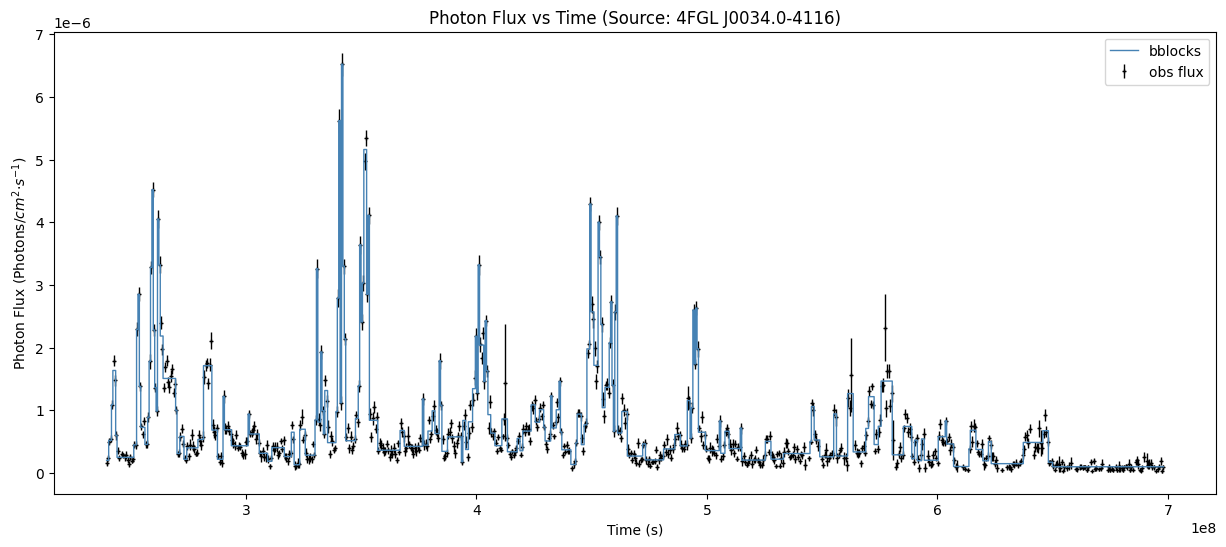

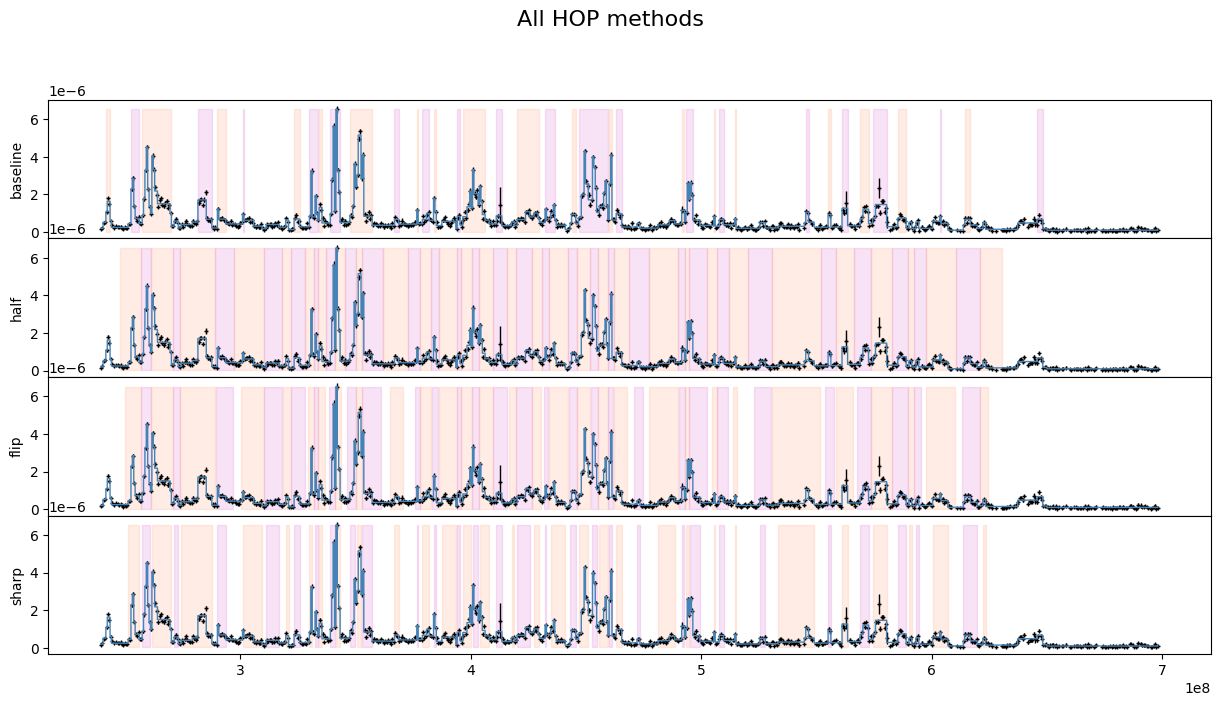

In [187]:
# This value indicates which number source we are using. 0 is the first source in the list.
sourcenum = 37 

# Suggested Sources by Jorge
# 
# 4FGL J2202.7+4216
# 4FGL J1512.8-0906

# This line filters the LCR array down to the chosen source
bayesianblockexamplearray=cadence_df[cadence_df['source_name']=='4FGL J1512.8-0906'] 
#bayesianblockexamplearray=cadence_df[cadence_df['source_name']==cadence_df['source_name'][sourcenum]] 
print('current array is using source:',cadence_df['source_name'][sourcenum]) # Double checking that the lightcurve array is correct

#Filtering out any 'bad' values for photon flux, and reordering the indices for easier use.
bayesianblockexamplearray = bayesianblockexamplearray[bayesianblockexamplearray['photon_flux2']!=-3333].reset_index(drop=True)
bayesianblockexamplearray['tmin']=bayesianblockexamplearray['tmin']



fig = plt.figure(figsize=(33, 6))
ax = fig.add_subplot(122)


#Sample time and photon flux data
time = bayesianblockexamplearray['tmin']
photon_flux = bayesianblockexamplearray['photon_flux2']
errors = bayesianblockexamplearray['photon_flux_error2']
sourcelightcurve=LC.LightCurve(time,photon_flux,errors)
plt.xlabel("Time (s)")
plt.ylabel('Photon Flux (Photons/$cm^2\u22c5s^{-1}$)')
titlestring=cadence_df['source_name'][sourcenum]
plt.title("Photon Flux vs Time" ' (Source: ' +str(titlestring)+ ')' )
sourcelightcurve.get_bblocks(p0_value=0.05)
#sourcelightcurve.get_bblocks_above(threshold=(np.mean(photon_flux)),pass_p0_value=0.05)
sourcelightcurve.plot_bblocks(size=1)
plt.legend()

sourcelightcurve.plot_all_hop(lc_edges='neglect')


hops_bl is a list of Hopjects with interesting attributes, see HOP.py
[<HOP.Hopject object at 0x000002A08A34C2B0>, <HOP.Hopject object at 0x000002A08A34C280>, <HOP.Hopject object at 0x000002A08A34C370>, <HOP.Hopject object at 0x000002A08A34C490>, <HOP.Hopject object at 0x000002A08A34C580>, <HOP.Hopject object at 0x000002A08A34C460>, <HOP.Hopject object at 0x000002A08A34C220>, <HOP.Hopject object at 0x000002A08A34C6A0>, <HOP.Hopject object at 0x000002A08A34D300>]
419515201.0 420876001.0 422236801.0
241401601.0 420876001.0 422992801.0
422992801.0 424353601.0 426168001.0
423748801.0 424353601.0 424958401.0


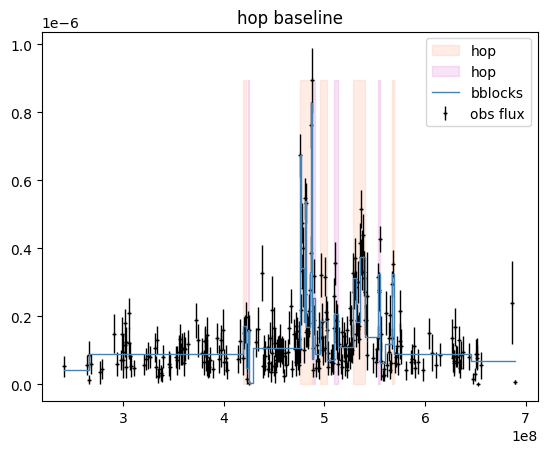

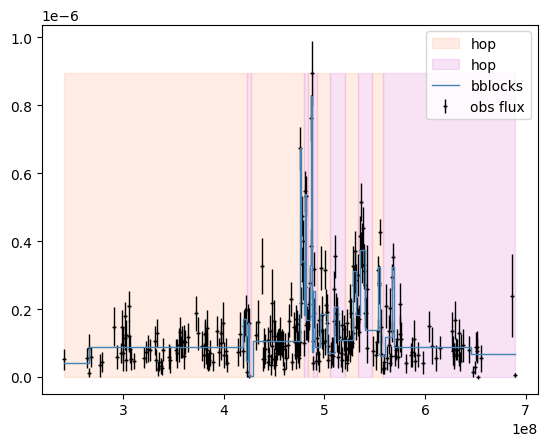

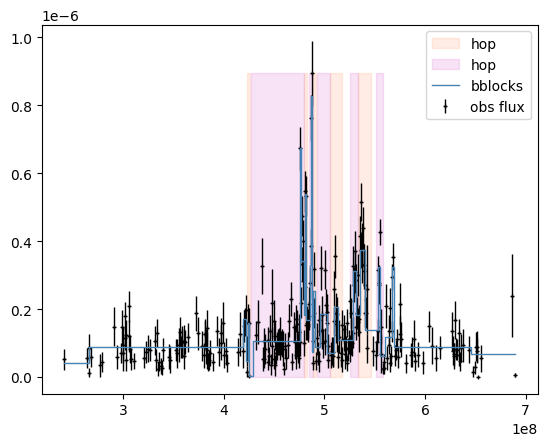

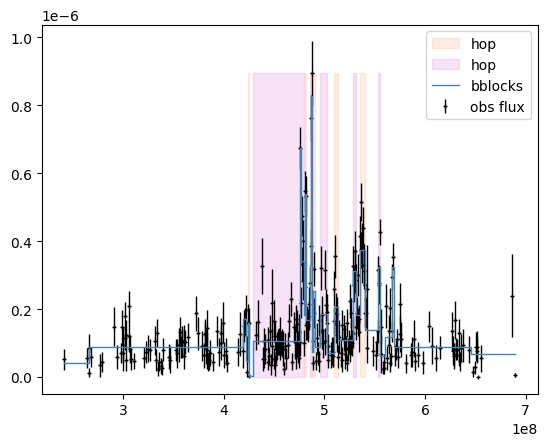

In [165]:
plt.figure()
hops_bl = sourcelightcurve.find_hop('baseline')
print('hops_bl is a list of Hopjects with interesting attributes, see HOP.py')
print(hops_bl)
hop = hops_bl[0]
print(hop.start_time, hop.peak_time, hop.end_time)
sourcelightcurve.plot_hop()
sourcelightcurve.plot_bblocks()
plt.title('hop baseline')
plt.legend()

plt.figure()
hops_half = sourcelightcurve.find_hop('half', lc_edges='add')
#one could add the edges of the light curve as start and end of HOP if there is a peak
hop = hops_half[0]
print(hop.start_time, hop.peak_time, hop.end_time)
sourcelightcurve.plot_hop()
sourcelightcurve.plot_bblocks()
plt.legend()

plt.figure()
hops_flip = sourcelightcurve.find_hop('flip', lc_edges='neglect') 
#or one could conservatively neglect the edges of the light curve 
#because it is uncertain whether there would be more decrease/increase of flux
hop = hops_flip[0]
print(hop.start_time, hop.peak_time, hop.end_time)
sourcelightcurve.plot_hop()
sourcelightcurve.plot_bblocks()
plt.legend()

plt.figure()
hops_sharp = sourcelightcurve.find_hop('sharp', lc_edges='neglect') 
hop = hops_sharp[0]
print(hop.start_time, hop.peak_time, hop.end_time)
sourcelightcurve.plot_hop()
sourcelightcurve.plot_bblocks()
plt.legend()

asymmetry measure:  -0.046511627906976744


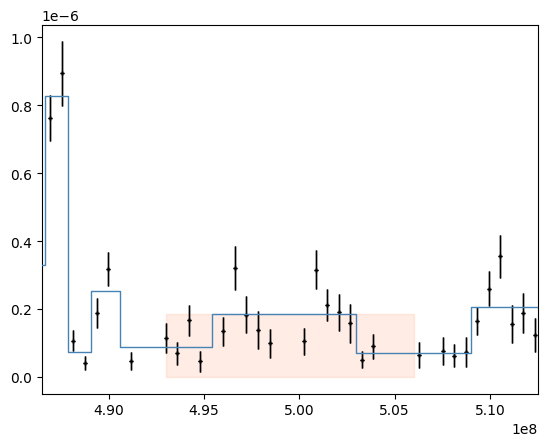

In [154]:
plt.figure()
hop = hops_flip[5]
print('asymmetry measure: ', hop.asym)
hop.plot_hop()

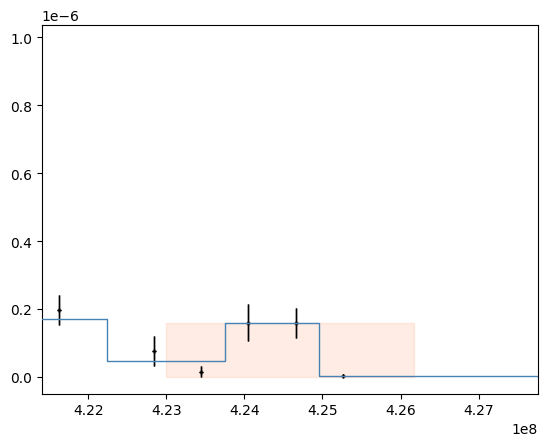

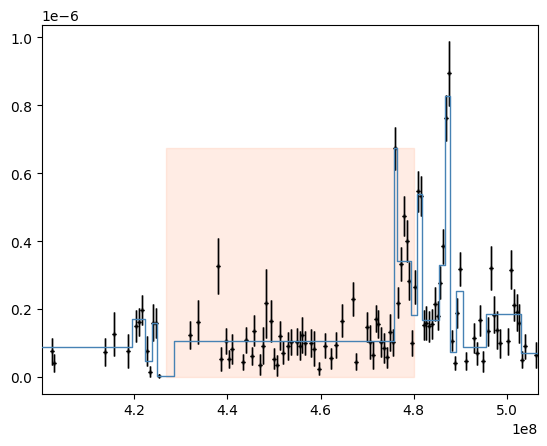

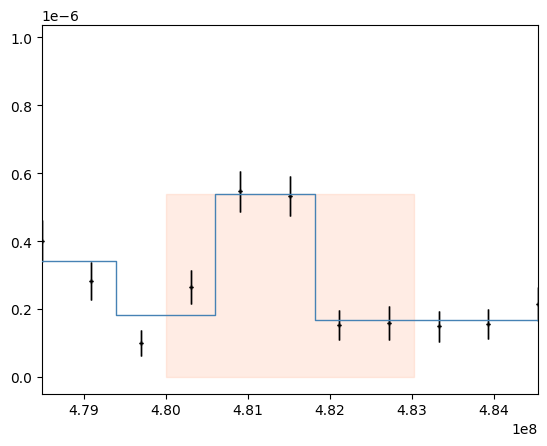

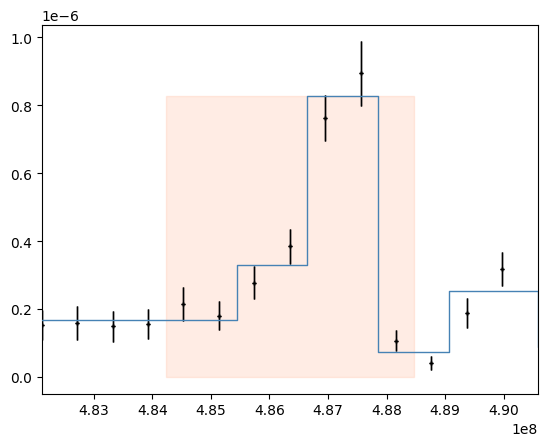

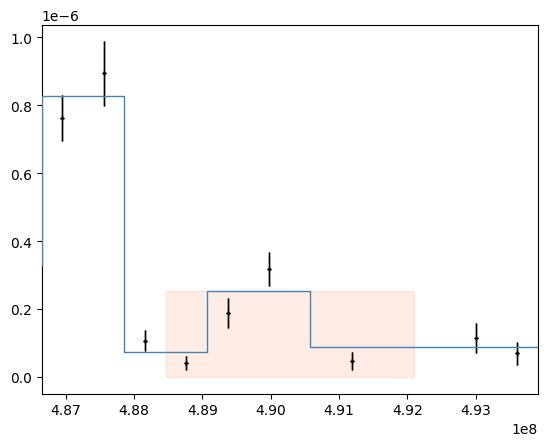

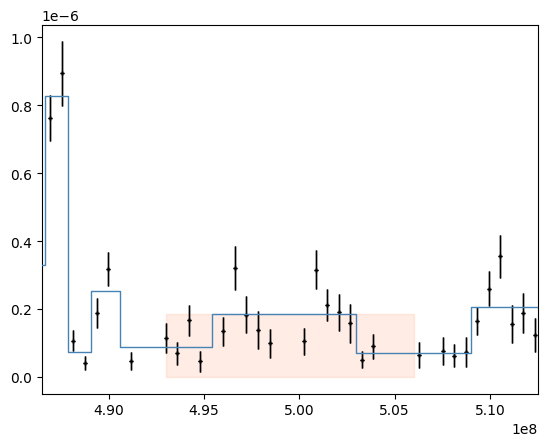

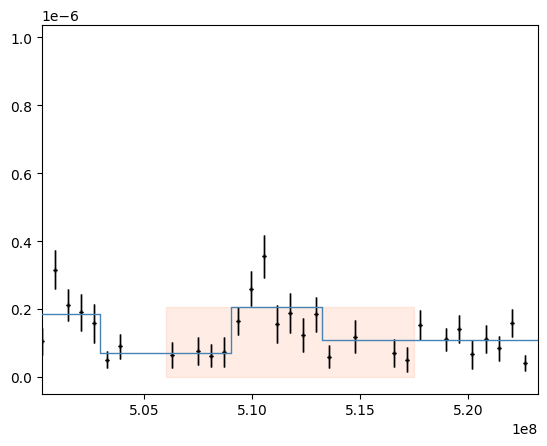

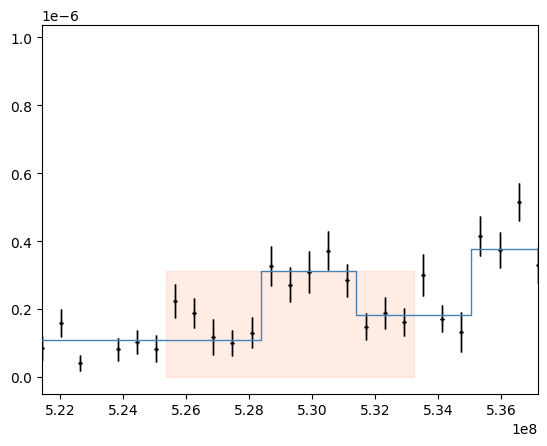

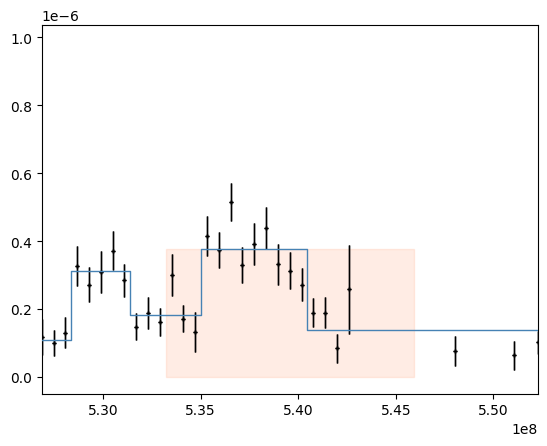

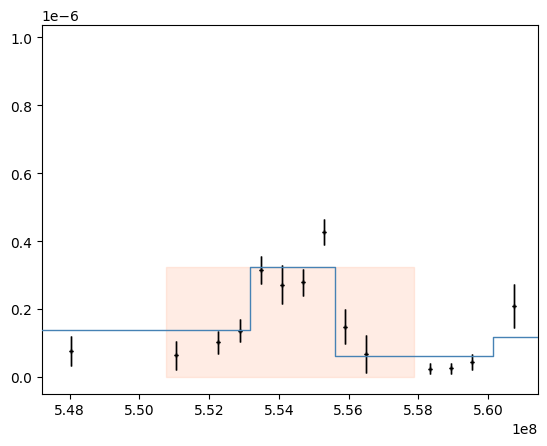

In [158]:
for i in range(len(hops_flip)):
    hop=hops_flip[i]
    plt.figure()
    hop.plot_hop()